# Python入門 2_01
## 可視化

### 可視化のための代表的なパッケージや関数

- Matplotlib: https://matplotlib.org/, 
- Pandasのplot関数, 
- seaborn: https://seaborn.pydata.org/, 

etc.

####  Matplotlibのグラフの色の名前など
- colormap: https://matplotlib.org/examples/color/colormaps_reference.html,
- colorname: https://matplotlib.org/examples/color/named_colors.html.

In [1]:
# パッケージの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Jupyter上で図を出すためのコマンド
%matplotlib inline 

In [2]:
#　データの読み込み
df = pd.read_csv('./data/sales.csv', dtype={'user_id': 'object', 'item_cd': 'object'}, parse_dates=['date'])

#### データの概要
* 小売店の売上のデータ
* user_id: ユーザーのid
* item_cd: 商品コード
* date: 購入年月日
* dow: 購入曜日
* amount: 購入金額


In [3]:
# データの冒頭5行を確認
df.head()

,user_id,item_cd,date,dow,amount
0,1,25007,2012-03-01,4_Thu,1163
1,1,87633,2012-03-01,4_Thu,292
2,2,335006,2012-03-01,4_Thu,300
3,3,265356,2012-03-01,4_Thu,2301
4,3,273123,2012-03-01,4_Thu,3685


### ヒストグラム

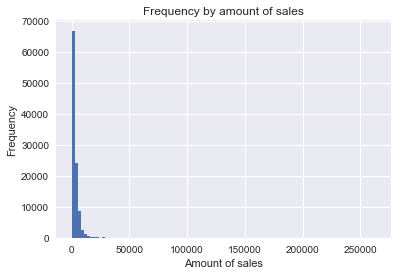

In [4]:
# 金額別購買回数のヒストグラムを表示
plt.hist(df['amount'], bins=100) # ヒストグラムを書く対象を指定
plt.title('Frequency by amount of sales') # タイトル
plt.xlabel('Amount of sales') # x軸のラベル
plt.ylabel('Frequency') # y軸のラベル

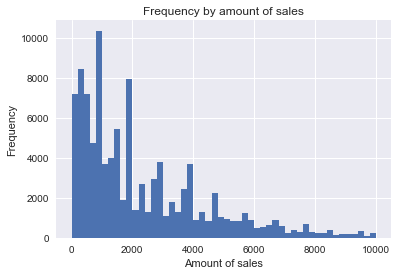

In [5]:
# 金額別購買回数（金額が10000以下)のヒストグラムを表示
plt.hist(df['amount'], bins=50, range=(0, 10000))
plt.title('Frequency by amount of sales')
plt.xlabel('Amount of sales')
plt.ylabel('Frequency')
plt.show() # 入れると`Out[n]`と出てこない

### 棒グラフ

In [6]:
# dowごとの件数のデータフレームを作成
df1 = df.groupby('dow').size().to_frame('count').reset_index()
df1

,dow,count
0,1_Mon,11212
1,2_Tue,6784
2,3_Wed,6691
3,4_Thu,7164
4,5_Fri,12948
5,6_Sat,27186
6,7_Sun,32893


In [7]:
# 引数に与える変数を準備
index = df1.index
label = df1['dow']

In [8]:
index

RangeIndex(start=0, stop=7, step=1)

In [9]:
label

0    1_Mon
1    2_Tue
2    3_Wed
3    4_Thu
4    5_Fri
5    6_Sat
6    7_Sun
Name: dow, dtype: object

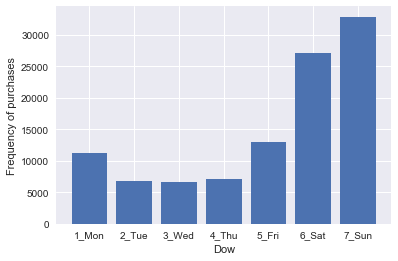

In [10]:
# 曜日別購買回数の棒グラフを表示
plt.bar(index, df1['count'], tick_label=label)
plt.xlabel('Dow')
plt.ylabel('Frequency of purchases')

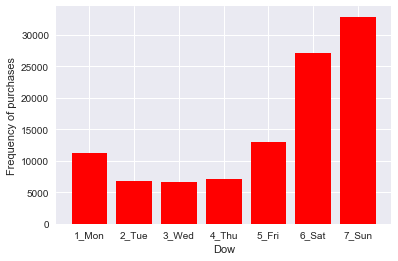

In [11]:
# 色を変える
plt.bar(index, df1['count'], tick_label=label, color='red')
plt.xlabel('Dow')
plt.ylabel('Frequency of purchases')

In [12]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

In [13]:
df.head()

,user_id,item_cd,date,dow,amount
0,1,25007,2012-03-01,4_Thu,1163
1,1,87633,2012-03-01,4_Thu,292
2,2,335006,2012-03-01,4_Thu,300
3,3,265356,2012-03-01,4_Thu,2301
4,3,273123,2012-03-01,4_Thu,3685


In [14]:
# 月(month)の列を日付(date)の列から作成
df['month'] = df['date'].dt.month
df.head()

,user_id,item_cd,date,dow,amount,month
0,1,25007,2012-03-01,4_Thu,1163,3
1,1,87633,2012-03-01,4_Thu,292,3
2,2,335006,2012-03-01,4_Thu,300,3
3,3,265356,2012-03-01,4_Thu,2301,3
4,3,273123,2012-03-01,4_Thu,3685,3


In [15]:
# 月と曜日ごとに件数をカウント
df2 = df.groupby(['month', 'dow']).size().to_frame('count').reset_index()
df2

,month,dow,count
0,3,1_Mon,2518
1,3,2_Tue,3008
2,3,3_Wed,2530
3,3,4_Thu,3144
4,3,5_Fri,7944
5,3,6_Sat,13044
6,3,7_Sun,10148
7,4,1_Mon,8694
8,4,2_Tue,3776
9,4,3_Wed,4161


In [16]:
# 曜日を行に月を列に並べる
df2 = df2.pivot(index='dow', columns='month', values='count')
df2 

month,3,4
dow,,
1_Mon,2518,8694
2_Tue,3008,3776
3_Wed,2530,4161
4_Thu,3144,4020
5_Fri,7944,5004
6_Sat,13044,14142
7_Sun,10148,22745


In [17]:
df2[3]

dow
1_Mon     2518
2_Tue     3008
3_Wed     2530
4_Thu     3144
5_Fri     7944
6_Sat    13044
7_Sun    10148
Name: 3, dtype: int64

In [18]:
df2[4]

dow
1_Mon     8694
2_Tue     3776
3_Wed     4161
4_Thu     4020
5_Fri     5004
6_Sat    14142
7_Sun    22745
Name: 4, dtype: int64

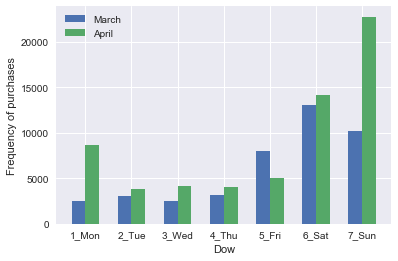

In [19]:
# 曜日別購買回数の月ごとの棒グラフの表示
width=0.3 #棒の幅
plt.bar(index - width/2, df2[3], width=width)
plt.bar(index + width/2, df2[4], width=width)
plt.xticks(index, label)
plt.xlabel('Dow')
plt.ylabel('Frequency of purchases')
plt.legend(('March', 'April'))

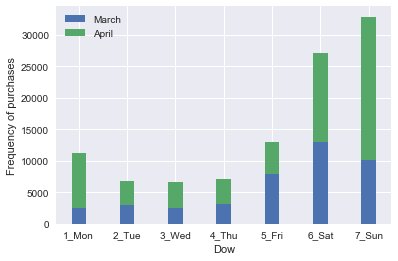

In [20]:
# 積み上げ棒グラフにする
plt.bar(index, df2[3], width=width)
plt.bar(index, df2[4], width=width, bottom=df2[3])
plt.xticks(index, label)
plt.xlabel('Dow')
plt.ylabel('Frequency of purchases')
plt.legend(('March', 'April'))

#### Pandasのplot関数を使う方法

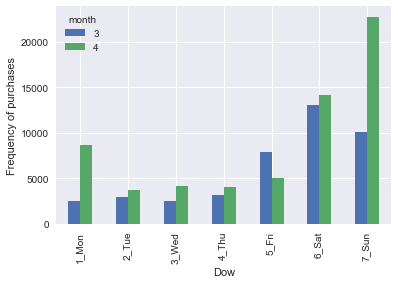

In [21]:
df2.plot.bar()
plt.xlabel('Dow')
plt.ylabel('Frequency of purchases')

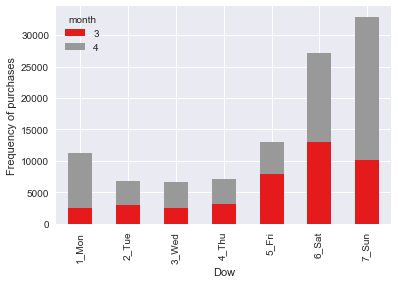

In [22]:
# 積み上げ
df2.plot.bar(stacked=True, colormap='Set1')
plt.xlabel('Dow')
plt.ylabel('Frequency of purchases')

### 折れ線グラフ（時系列）

In [23]:
#日別の売り上げを集計
df3 = df.groupby('date')[['amount']].sum()
df3.head()

,amount
date,
2012-03-01,1495162
2012-03-02,922501
2012-03-03,2242767
2012-03-04,3201507
2012-03-05,850137


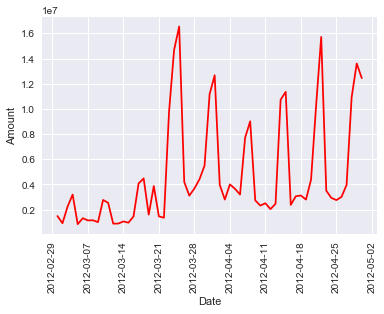

In [24]:
# 日別の売り上げの折れ線グラフ(時系列)を書く
plt.plot(df3, color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

### 散布図

In [25]:
# データを読み込み
tips = sns.load_dataset("tips") # seabornにデフォルトで入っているtipsデータを読み込む

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


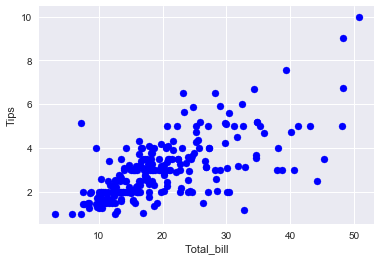

In [27]:
# 散布図の表示
plt.scatter(tips['total_bill'], tips['tip'], color='blue')
plt.xlabel('Total_bill')
plt.ylabel('Tips')

### 円グラフ

In [28]:
# 性別ごとにグループ化
df5 = tips.groupby(['sex'], as_index=False)['tip'].sum()
df5

,sex,tip
0,Male,485.07
1,Female,246.51


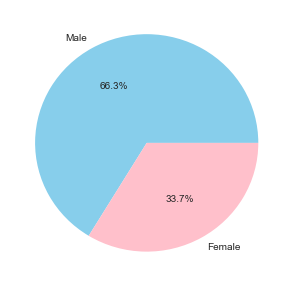

In [29]:
# 円グラフを表示
plt.figure(figsize=(5, 5))
plt.pie(df5['tip'], colors=['skyblue', 'pink'], labels=df5['sex'], autopct='%1.1f%%')
plt.show()

### グラフの保存

In [30]:
# ディレクトリを作成
if not os.path.exists('./output/'):
    os.mkdir('./output')

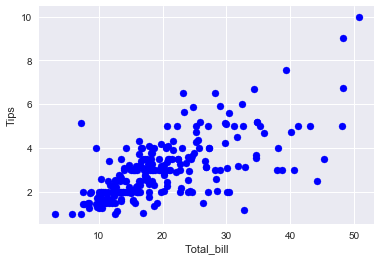

In [31]:
plt.scatter(tips['total_bill'], tips['tip'], color='blue')
plt.xlabel('Total_bill')
plt.ylabel('Tips')
plt.savefig('./output/test_pie.png')

### 参考: seabornによる可視化

matplotlibをコアのパッケージとし, matplotlibより高度な機能を簡単に実行できる可視化パッケージにseabornがある.

例えば, 一つのDataFrameから可視化を行うには便利.

#### 散布図行列

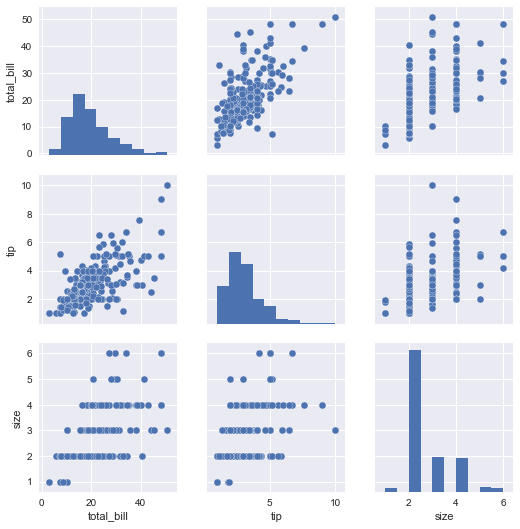

In [32]:
# 散布図行列を表示
sns.pairplot(tips)

In [33]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


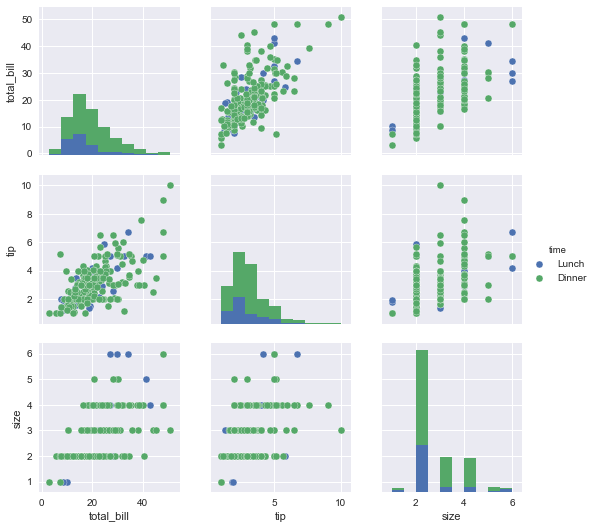

In [34]:
# timeごとに色を分ける
sns.pairplot(tips, hue='time')

#### ファセット

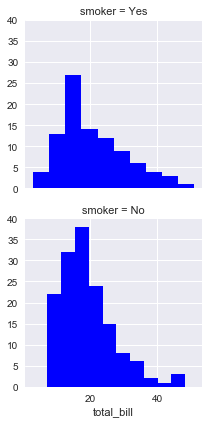

In [35]:
# smokerごとにtotal_billのヒストグラムを縦に表示 
g = sns.FacetGrid(tips, row='smoker')
g = g.map(plt.hist, 'total_bill', color='blue')

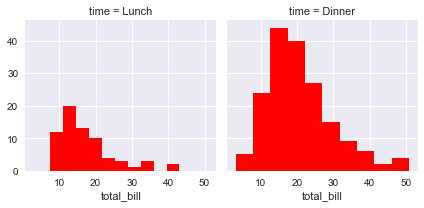

In [36]:
# timeごとにtotal_billのヒストグラムを横に表示 
h = sns.FacetGrid(tips, col='time')
h = h.map(plt.hist, 'total_bill', color='red')

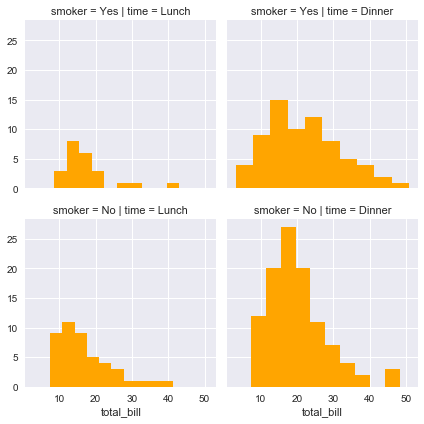

In [37]:
# smokerごと・timeごとに図を分割する（行列に並べる）
i = sns.FacetGrid(tips, row='smoker', col='time')
i = i.map(plt.hist, 'total_bill', color='orange')